<a href="https://colab.research.google.com/github/abmorte/match-emprego/blob/main/avaliacao-hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de hiperparâmetros para agrupamento Fuzzy C Means - Candidatos e Vagas

#### Imports

In [87]:
!pip install openpyxl

You should consider upgrading via the 'c:\users\edmilson\downloads\mestrado\match-emprego\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [88]:
#!pip install matplotlib
#!pip install pandas
#!pip install sklearn
#!pip install -U scikit-learn
!pip install scikit-fuzzy --upgrade


You should consider upgrading via the 'c:\users\edmilson\downloads\mestrado\match-emprego\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import skfuzzy as fz

In [90]:
# Read the data
df_candidatos = pd.read_excel('data/candidatos-ba.xlsx')
#caminho = 'data/vagas-ba.csv'
#df_candidatos = pd.read_csv(caminho,encoding = "ISO-8859-1",sep=';')
#df_candidatos = pd.read_excel('data/vagas-pr-100.xlsx', index_col=0)
df_candidatos.head()

,Unnamed: 0,id_cadidato,cd_ibge_municipio_interesse,cbo_pretensao,n_graduacoes,n_cursos,n_idiomas,n_escolaridade,n_deficiencia
0,0,1,290570,414140,0,0,0,-1,0
1,1,1,290570,521110,0,0,0,-1,0
2,2,1,290570,716610,0,0,0,-1,0
3,3,1,290570,717020,0,0,0,-1,0
4,4,1,290570,784205,0,0,0,-1,0


In [91]:

# renomeia o campo de cbo_pretencao para cod_ocupacao para permitir o join de candidato x vagas
df_candidatos['cod_ocupacao']=df_candidatos['cbo_pretensao']
df_candidatos=df_candidatos.drop(['cbo_pretensao'],axis=1)

# renomeia o campo de cd_ibge_municipio_interesse para cd_municipio_ibge para permitir o join de candidato x vagas
df_candidatos['cd_municipio_ibge']=df_candidatos['cd_ibge_municipio_interesse']
df_candidatos=df_candidatos.drop(['cd_ibge_municipio_interesse'],axis=1)


In [92]:
# Read the data
df_vagas = pd.read_excel('data/vagas-ba.xlsx')
#caminho = 'data/vagas-ba.csv'
#df_candidatos = pd.read_csv(caminho,encoding = "ISO-8859-1",sep=';')
#df_candidatos = pd.read_excel('data/vagas-pr-100.xlsx', index_col=0)
df_vagas.head()

,Unnamed: 0,cod_ocupacao,cd_municipio_ibge,salario,tipo_contratacao,qtd_experiencia,escolaridade,n_deficiencia
0,0,516120,291080,0,3,6,5,0
1,1,411005,291955,0,3,0,5,0
2,2,783215,291072,880,3,0,5,0
3,3,521110,291980,0,3,6,5,0
4,4,524105,292740,0,3,0,3,0


In [93]:
df_candidatos

,Unnamed: 0,id_cadidato,n_graduacoes,n_cursos,n_idiomas,n_escolaridade,n_deficiencia,cod_ocupacao,cd_municipio_ibge
0,0,1,0,0,0,-1,0,414140,290570
1,1,1,0,0,0,-1,0,521110,290570
2,2,1,0,0,0,-1,0,716610,290570
3,3,1,0,0,0,-1,0,717020,290570
4,4,1,0,0,0,-1,0,784205,290570
...,...,...,...,...,...,...,...,...,...
6694,6694,1944,0,3,0,-1,0,422105,291400
6695,6695,1944,0,3,0,-1,0,521125,291400
6696,6696,1944,0,3,0,-1,0,764005,291400
6697,6697,1944,0,3,0,-1,0,764205,291400


In [94]:
df_candidatos.n_deficiencia.unique()[0]

0

In [95]:
df_geral = pd.merge(df_vagas, df_candidatos,on=['cod_ocupacao','cd_municipio_ibge','n_deficiencia'])

In [96]:
# Gruarda a referencia do Id do candidado por linha e apaga essa coluna do dataset
lista_candidatos=df_geral['id_cadidato']
df_geral.drop(['id_cadidato'],axis=1,inplace=True)

In [97]:
df_geral.drop(['Unnamed: 0_x'],axis=1,inplace=True)

In [98]:
df_geral.drop(['Unnamed: 0_y'],axis=1,inplace=True)

In [99]:
df_geral.head(10)

,cod_ocupacao,cd_municipio_ibge,salario,tipo_contratacao,qtd_experiencia,escolaridade,n_deficiencia,n_graduacoes,n_cursos,n_idiomas,n_escolaridade
0,516120,291080,0,3,6,5,0,0,0,0,-1
1,411005,291955,0,3,0,5,0,0,0,0,-1
2,411005,291955,0,3,0,5,0,1,0,0,7
3,411005,291955,0,3,0,5,0,0,0,0,-1
4,524105,292740,0,3,0,3,0,1,0,0,-1
5,524105,292740,0,3,0,3,0,0,0,0,-1
6,524105,292740,0,3,0,3,0,1,2,0,-1
7,524105,292740,0,3,0,3,0,0,0,0,-1
8,524105,292740,0,3,0,3,0,0,0,0,-1
9,524105,292740,0,3,0,3,0,0,0,0,-1


In [100]:
#transofrmando os atributos em uma escala menor
scaler  =StandardScaler()
sc_geral = scaler.fit_transform(df_geral)

In [101]:
#Executando o agrupamento fuzzy c means
# c - é o número de agrupamentos
# m - distância interna entre os objetos, quanto maior o valor maior a distância
# error - se o erro de distância for maior que 0.005 ele para
# maxiter - é o numero máximo de iterações
n_grupo=32
agrupamento = fz.cmeans(data=sc_geral.T, c=n_grupo, m=n_grupo, error=0.005, maxiter=1000)

In [102]:
#Recupera o grau de pertinencia dos 32 clusters
grau_pertinencia = agrupamento[1]

In [103]:
#Imprime o tamanho da matrix de graus de pertinencia
grau_pertinencia.shape
# Ou seja, temos 32 grupos para 7504 colunas

(32, 1175)

In [104]:
# Pertinência da primeira coluna (candidato) em relação ao grupo 0
grau_pertinencia[0][0]

0.031265091312247945

In [105]:
# Pertinência da primeira coluna (candidato) em relação ao grupo 31
grau_pertinencia[n_grupo-1][0]

0.031266695994869406

In [106]:
# Retorna o índice do maior valor de pertinencia de cada elemento/coluna
clusters = grau_pertinencia.argmax(axis=0)
clusters

array([ 9, 24, 24, ..., 24, 24, 24], dtype=int64)

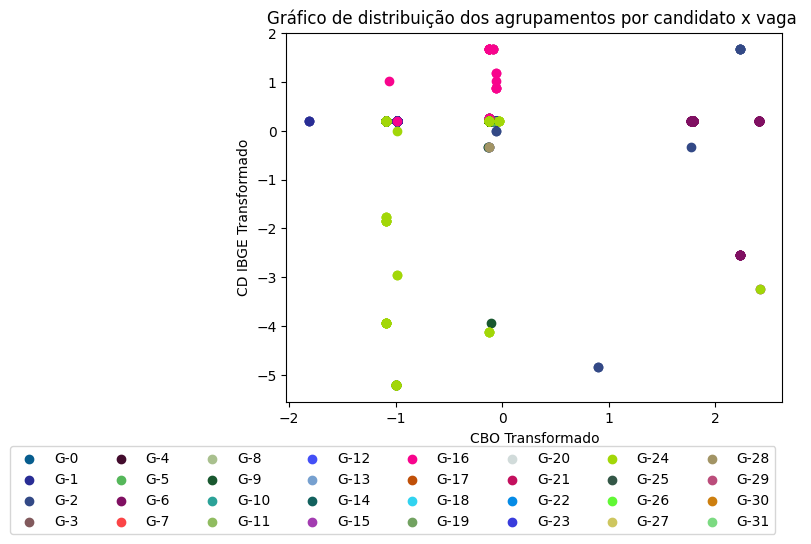

In [158]:
#gráfico de distribuição dos pontos 

import random

colors = []
list_group =[]
for j in range(n_grupo):
    colors.append("#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))
    list_group.append("G-"+str(j))

           
for i in range(0,n_grupo):
    plt.scatter(sc_geral[clusters ==i, 0],
            sc_geral[clusters ==i, 1], c = colors[i], label=list_group[i])
plt.xlabel("CBO Transformado")
plt.title('Gráfico de distribuição dos agrupamentos por candidato x vaga ')
plt.ylabel("CD IBGE Transformado")
plt.legend( ncol=n_grupo / 4, bbox_to_anchor=(1, -0.1))
plt.show()


#### Método Fuzzy C Means para agrupamento do dataset estabelecendo o grau de pertinência para cada candidato x vaga

In [108]:
df_geral.head()

,cod_ocupacao,cd_municipio_ibge,salario,tipo_contratacao,qtd_experiencia,escolaridade,n_deficiencia,n_graduacoes,n_cursos,n_idiomas,n_escolaridade
0,516120,291080,0,3,6,5,0,0,0,0,-1
1,411005,291955,0,3,0,5,0,0,0,0,-1
2,411005,291955,0,3,0,5,0,1,0,0,7
3,411005,291955,0,3,0,5,0,0,0,0,-1
4,524105,292740,0,3,0,3,0,1,0,0,-1


array([1172,   13, 1735, ...,  723, 1292, 1848], dtype=int64)

In [109]:
#Efetua a recomposição do dataframe de Candidato, juntando o id_candidtato e o cluster de classificação indicado para cada candidato.
df_resultado=pd.DataFrame([np.asarray(lista_candidatos), np.asarray(clusters)]).T

In [110]:
# renomeia as colunas do novo dataframe
df_resultado.columns=['id_candidato','cluster']

In [127]:
#Exibe a relação final com id_candidato x cluster de vaga recomendado
df_resultado

,id_candidato,cluster
0,1172,9
1,13,24
2,1735,24
3,1781,24
4,99,24
...,...,...
1170,1930,6
1171,545,24
1172,723,24
1173,1292,24
